In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

#### Empezamos a crear todo desde cero. Creamos los ejemplos

In [4]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean = None,
                        cov = 0.1,
                        n_samples = N,
                        n_features = 2,
                        n_classes = 2,
                        shuffle = True,
                        random_state=None
                       )

X, Y = gaussian_quantiles

In [5]:
Y = Y[:, np.newaxis]

#### Funciones de activación

In [7]:
# Función de activación ReLU
def relu(x, derivate=False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

# Funcion de activación Sigmoide
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

#### Función de pérdida

In [8]:
# Función de pérdida MSE
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

#### Problema a resolver con la red neuronal

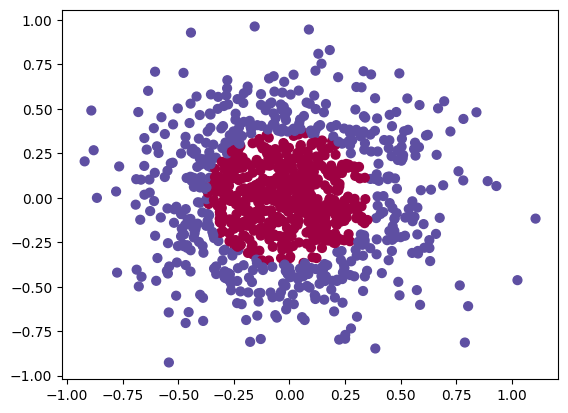

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

In [17]:
def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0, L-1):
        parameters[f'W{str(l+1)}'] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) - 1
        parameters[f'b{str(l+1)}'] = (np.random.rand(1,layers_dim[l+1]) * 2) - 1
    return parameters

In [20]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)

In [21]:
params

{'W1': array([[-0.2263818 ,  0.5637902 ,  0.64016882,  0.71458888],
        [-0.22065369,  0.35061798,  0.6435769 ,  0.52104729]]),
 'b1': array([[-2.87509628e-04,  5.21723101e-01,  8.62660281e-01,
          6.91676369e-01]]),
 'W2': array([[-0.49498107,  0.60291964,  0.56240088, -0.27321447, -0.29945885,
          0.99802217, -0.22243516,  0.45432887],
        [ 0.32501176, -0.46132905,  0.33540263, -0.51331918, -0.49072752,
          0.41146656,  0.93137857,  0.12454228],
        [-0.03783608, -0.58643098,  0.76357113,  0.83973359,  0.47860961,
          0.20257419,  0.5308833 ,  0.63302083],
        [-0.40460713,  0.68153104, -0.51388701, -0.57960946, -0.38590342,
         -0.93833829,  0.40710999, -0.81861921]]),
 'b2': array([[-0.71150114, -0.77015041, -0.74155791, -0.32398249,  0.51603802,
          0.7506151 ,  0.63752352, -0.41964768]]),
 'W3': array([[-0.55821499],
        [ 0.39971674],
        [ 0.40809995],
        [ 0.26070286],
        [-0.67783923],
        [ 0.43546088]